# 02806 Social Data Analysis and Visualization Final Project - Analyze the reasons and patterns behind the San Francisco's traffic crashes from 2005 to 2023.

## 1. Motivation

### 1.1 What is your dataset?
The dataset comprises comprehensive traffic crash data (resulting in an injury) in the city of San Francisco sourced from the [San Francisco government][1], spanning **from 2005 to 2023**. The dataset is **49.3 MB** as a csv file, including **59,000 rows** and **55 columns**, detailing crucial features including crash timing (datetime), location, weather, road conditions, light conditions and casualty statistics, and so on. In addition, the data also introduces the collision group involved, e.g. if it is a vehicles only crash, or a vehicle-bicycle crash, or vehicle-pedestrian crash, etc.

### 1.2 Why did you choose this/these particular dataset(s)?
We selected this particular dataset firstly because of its substantial size, offering a wide array of columns for multifaceted analysis and a significant number of rows to not only do deep dive analysis, but also potentially facilitate the application of machine learning algorithms, enabling us to forecast potential traffic crash occurrences. Moreover, the dataset's content is of particular interest to us as it holds the promise of revealing insights into the causes and patterns of traffic crashes, with the potential to contribute to the reduction of accidents in San Francisco and even save lives through the dissemination of data-driven truths.

### 1.3 What was your goal for the end user's experience?

Our goal for the end user's experience is firstly to systematically unveil the underlying reasons and patterns behind traffic crashes in San Francisco to the end user. Secondly we are also dedicated to presenting this information in a simple, clean but attrative manner, ensuring that our visualizations effectively convey the true narrative and insights clearly, regardless of the user's expertise in visualizations, meanwhile making the end user feel engaged while reading through our story. By prioritizing simplicity, we aim to avoid overwhelming the end user and instead offer a clear and accessible understanding of the data's truth and story.

## 2. Basic stats

### 2.1 Write about your choices in data cleaning and preprocessing
The dataset comes from the San Francisco govenment with quite many columns and has some null values when we initially doing analysis by screening the csv file itself, based on the [best practices][2] of data cleaning, we hence decide to do below steps of cleaning.
1. **Remove redundant columns**: This step ensure that we narrow our focus to valuable and informative columns, we remove the columns that cannot or hard to be used to analyze the reasons/patterns behind the traffic crashes.
2. **Deduplicate records handling**: This step ensure that we use a dataset without duplicates, to avoid wrong analysis result coming from the duplicated records.
3. **Deal with missing data**: This step ensure that we use proper way to handle missing data, so that we use accurate dataset to do the analysis.
4. **Filter out data outliers**: It is important to handle the outliers while there are many numeric features, however in our dataset we have mostly categorizing features, so we skip this step in our project.


#### 2.1.1 Remove redundant columns
The most common reasons of the removing columns are:
  - Columns with always exact the same value.
  - Columns with only a code value without explanation about what it means.
  - Columns with a lot of null values and are not key features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data source from local path
# C:\\Users\\dongz\\Desktop\\02806\\Traffic_Crashes_Resulting_in_Injury_20240414.csv
source_df = pd.read_csv('/Users/wegz/Downloads/Traffic_Crashes_Resulting_in_Injury_20240412.csv', low_memory=False)
# source_df = pd.read_csv('D:\\02806\\02806_Final_old\\02806_Final\\Traffic_Crashes_Resulting_in_Injury_20240428.csv', low_memory=False)
# Drop columns that are not needed, according to reasons listed above
source_df.drop([ 'unique_id','cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
                'geocode_source', 'geocode_location', 'juris', 'officer_id',
                'beat_number', 'weather_2', 'control_device', 'vz_pcf_code',
                'vz_pcf_group', 'vz_pcf_description', 'vz_pcf_link', 'dph_col_grp',
                'data_as_of', 'data_loaded_at'], axis=1, inplace=True)


#### 2.1.2 Duplicate records handling

In [2]:
print(f'source df duplicated count: {source_df.duplicated().sum()}')
source_df.drop_duplicates(inplace=True)
print(f'source df duplicated count after drop: {source_df.duplicated().sum()}')


source df duplicated count: 44
source df duplicated count after drop: 0


In [3]:
source_df.reset_index(drop=True, inplace=True)
source_df['unique_id'] = source_df.index


#### 2.1.3 Deal with missing data
Given the critical nature of our data source, ensuring accuracy and reliability is paramount. In handling missing data, our approach prioritizes the preservation of data integrity. Consequently, the most appropriate method involves filtering out rows lacking key feature values, thereby guaranteeing that our analysis is based solely on complete and reliable data.

In [4]:
# Check which columns have null values
source_df.isnull().sum()[source_df.isnull().sum() > 0]
# Define key feature columns which needs to be handled
# Key feature columns means that they are valuable for further analysis and visualizations.
columns_to_handle = ['tb_latitude', 'tb_longitude', 'collision_time', 'day_of_week', 'time_cat']
# Drop rows with null values in key feature columns, and assign the result to a new dataframe df
df = source_df.dropna(subset=columns_to_handle)
# df is now ready to be used for analysis.


### 2.2 Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

We made some visualizations in order to see the distribution of the traffic crash data from different perspective, so that we know firstly if the dataset looks correct, secondly if there is any feature looks very skewed, thirdly to have a brief understanding which feature could be more interesting to deep dive and dig furture into.  
*We have conducted additional visualizations beyond those presented here, however aiming to maintain conciseness within our notebook we only highlight the most critical and intriguing ones.*

In [5]:
# Dependencies and set up default color.
import matplotlib.pyplot as plt
# Define the light blue color
light_blue = (0.68, 0.85, 0.9)
# Set the default color cycle to use the light blue color
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[light_blue])


#### 2.2.1 The count of traffic crash over the years from 2005 to 2023.

From below chart we can see that the overall traffic crash counts appear relatively consistent, with a noticeable decline from 2019 to 2020, followed by a gradual increase. We attribute this trend to the impact of the COVID-19 pandemic, a hypothesis supported by a news article [3] that validates our observation.

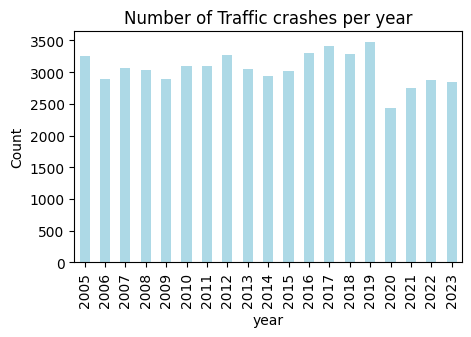

In [6]:
# Group by 'accident_year' and count the occurrences
type_counts = df['accident_year'].value_counts()
type_counts_sorted = type_counts.sort_index()

plt.figure(figsize=(5, 3))

# Plotting the bar chart
type_counts_sorted.plot(kind='bar')
plt.title('Number of Traffic crashes per year')
plt.xlabel('year')
plt.ylabel('Count')

# Display the plot
plt.show()


#### 2.2.2 The distribution of traffic crash count by type of the collision.
The below chart clearly illustrates that Broadside collisions has a significantly higher count compared to other types. To address the risks associated with Broadside collisions, modern vehicles should equip with safety features such as side-impact airbags, reinforced side structures, and side-curtain airbags to avoid the fatalities as much as possible. Furthermore, there could be advancements in traffic management, including the implementation of roundabouts and other intersection designs, aim to decrease the likelihood of these specific types of crashes.

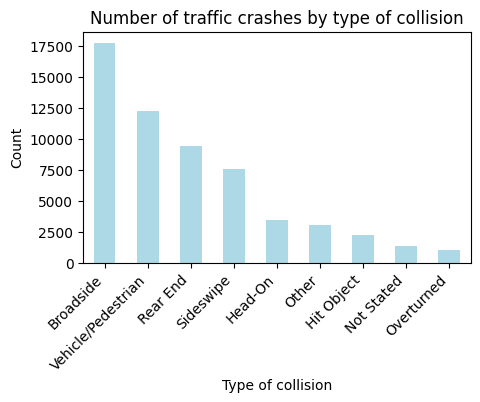

In [7]:
# Group by 'type_of_collision' and count the occurrences
type_counts = df['type_of_collision'].value_counts()

plt.figure(figsize=(5, 3))

# Plotting the bar chart
type_counts.plot(kind='bar')
plt.title('Number of traffic crashes by type of collision')
plt.xlabel('Type of collision')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()


#### 2.2.3 The distribution of traffic crash fatalities by parties involved type.

Given the severity of fatalities, our focus is to discern patterns based on the types of parties involved. The chart indicates that incidents involving Vehicle - Pedestrian interactions are most prevalent, aligning with the reality that individuals are more vulnerable compared to mechanical entities. This observation underscores the need to prioritize efforts aimed at reducing this specific type of crash to ultimately save lives.  
Due to the limited volume of available results data, we have chosen to transition our analytical focus from a narrow emphasis on fatalities to a broader, more comprehensive level of data analysis.



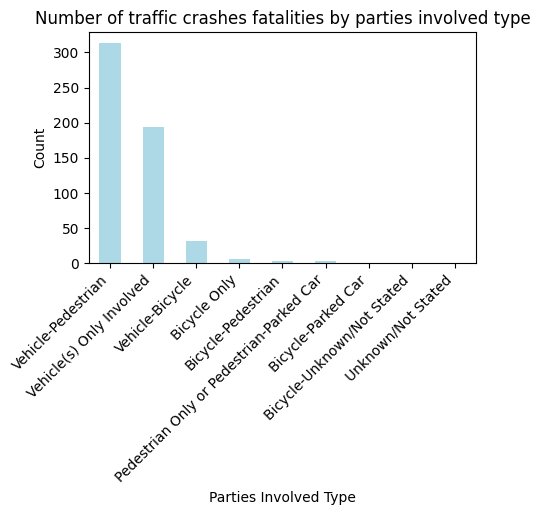

In [8]:
# Filter only records that have fatalities
number_killed_df = df[df['number_killed']>0]

# Group by 'collision_severity' and count the occurrences
crash_type_sums = number_killed_df.groupby('dph_col_grp_description')['number_killed'].sum()
# Sort the sums in descending order to have the most fatalities at the top
crash_type_sums = crash_type_sums.sort_values(ascending=False)
plt.figure(figsize=(5, 3))

# Plotting the bar chart
crash_type_sums.plot(kind='bar')
plt.title('Number of traffic crashes fatalities by parties involved type')
plt.xlabel('Parties Involved Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()


## 3. Data Analysis

### 3.1 Describe your data analysis and explain what you've learned about the dataset.

After cleaning and preprocessing the dataset, we conducted a thorough analysis of San Francisco's traffic crash data from 2005 to 2023. Here are the specific insights we've gathered from our visualizations:

#### 3.1.1 Yearly Trend in Traffic Crashes: 
The bar chart illustrates that the overall number of traffic crashes remained relatively consistent over the years. However, there was a noticeable decline between 2019 and 2020, followed by a gradual recovery. This reduction coincides with the COVID-19 pandemic, which significantly reduced traffic volume during lockdown periods, leading to fewer crashes.

#### 3.1.2 Distribution by Type of Collision: 
Broadside collisions have the highest count, clearly exceeding other collision types. This emphasizes the need for advanced safety features like reinforced side structures and airbags in modern vehicles. Moreover, roundabouts and safer intersection designs could play a crucial role in reducing broadside collisions, which often occur at traffic intersections.

#### 3.1.3 Fatalities by Parties Involved: 
Fatalities involving pedestrians were the highest, underscoring the vulnerability of pedestrians compared to other groups. The data points to the necessity of improving pedestrian infrastructure, including better crosswalk visibility, dedicated pedestrian signals, and traffic calming measures to protect pedestrians and reduce fatal incidents.

By focusing on these patterns, our analysis identifies areas where infrastructure improvements and vehicle safety features could mitigate traffic accidents and save lives. Following the exploratory analysis, we have affirmed the trajectory of our in-depth data analysis, encompassing perspectives related to time, location, and some other features showing in section 5.

### 3.2 If relevant, talk about your machine-learning.

Our aim is to leverage the existing dataset to forecast the occurrence of future traffic crashes, identifying both the timing and locations of potential incidents, along with the weather and lighting conditions that may significantly contribute to the likelihood of such events. To achieve this, we have conducted exploratory tests using machine learning algorithms such as linear regression to predict traffic crash counts and clustering to anticipate the probability of traffic crashes. Regrettably, due to the limited quantity of data and numerical features, our linear regression model yielded a notably high Mean Square Error, for instance, 24324.057062397624, indicating a lack of discernible patterns. Similarly, our analysis of the relationship between weather conditions, lighting, and traffic crash counts using clustering techniques also revealed minimal correlation, underscoring the challenges posed by the limited dataset.

## 4. Genre

### 4.1 Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

#### 4.1.1 Visual Structuring

We use **progress bar** to convey the overall structure of the narrative to users and let them know where they are in the visual content. Not only does this help users better locate where they are in the current content, but it also gives them an idea of what they have already viewed and what content remains, allowing users to track their progress in the analysis.

#### 4.1.2 Highlighting

We allow users to freely switch between global view and detail view by **zooming** out/in on the map. Users can understand the overall situation of the number of accidents in different areas at a glance, and can also zoom in on specific areas for more in-depth analysis, allowing for a more targeted analysis. This design helps users establish spatial awareness, understand which areas are accident-prone areas, and help users take next steps.

#### 4.1.3 Transition Guidance

When analyzing traffic accident data, **Viewing Angle** can effectively reveal important information such as the time, space, involvement, and severity of the accident. By changing the perspective, the different time points of the accident can be visually displayed, revealing all aspects of the accident scene, depicting the interaction of the parties involved in the accident, and highlighting the seriousness of the accident.

### 4.2 Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

#### 4.2.1 Ordering

We choose a **linear** narrative structure to provide a clear story line and allow readers to view the content sequentially according to the designer's intention. This clearly presents the time, location, cause and other information of the accident in a logical order, helping readers better understand the development process and causes of the accident.

#### 4.2.2 Interactivity

We've added **hover details** to several visualizations, allowing readers to view details or highlight relevant data with mouseover. For example, in the stacked bar chart, users can hover to see the specific number of selected sections. This interactive method allows users to selectively focus on the parts of interest, thereby avoiding information overload and improving reading efficiency.

Users can manipulate visualizations by **filtering/selection/search**. In interactive heat maps, readers customize the data view based on year selectors, thereby improving analysis efficiency and data analysis flexibility.

#### 4.2.3 Messaging

**Captions/headlines** provide brief text descriptions or titles that help convey key points or themes quickly, allowing readers to quickly understand the main content or direction of analysis, thereby guiding their attention.

**Introductory text** mainly introduces information about the San Francisco traffic accident data set. It describes the size and content of the dataset and explains the reasons for selecting this dataset, including its large size and diverse analytical potential, and its value for revealing causes and patterns of traffic accidents.

We have a **summary** in the discussion section by providing a comprehensive analysis of the data, which can help readers review and understand the presented content and deepen their understanding of traffic accident data.

## 5. Visualizations

### 5.1 Explain the visualizations you've chosen.

#### 5.1.1 Holiday Havoc vs. Weekday Wisdom: A Traffic Collision Comparison

In the bustling city of San Francisco, holidays typically signify relaxation and celebration, but what impact do they have on traffic safety? As city dwellers take a break during the holidays, does the rate of traffic incidents on the streets fluctuate? Especially on public holidays and weekends, the question we seek to explore is:

"Is there a disparity in the rate of traffic accidents in San Francisco between holidays and regular workdays? Are rest days indeed more perilous, or are they, in fact, safer?"

To address this question, a thorough investigation into the specific dates and times when accidents are more likely to occur could reveal if holidays are indeed times of heightened risk or unexpected safety on the roads.

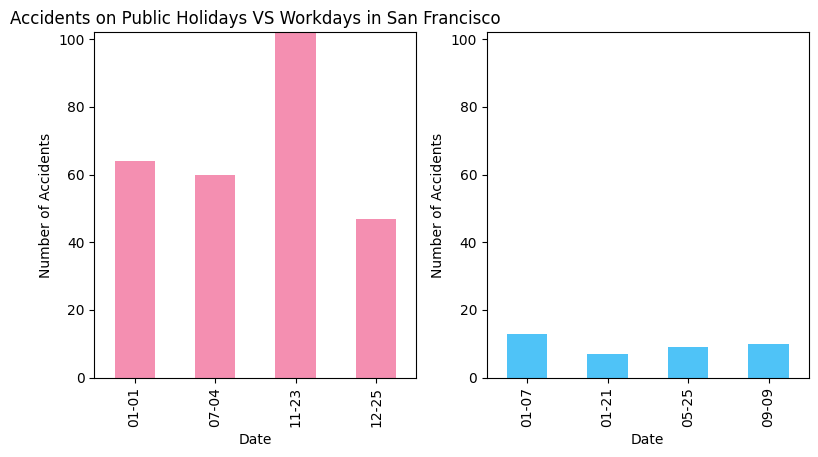

In [10]:
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

df['collision_date'] = pd.to_datetime(df['collision_date'])
holidays_list = pd.date_range(start='2005-01-01', end='2023-12-31', freq='B')\
                  .to_series()\
                  .loc[lambda x: (x.dt.month == 1) & (x.dt.day == 1) |
                                  (x.dt.month == 7) & (x.dt.day == 4) |
                                  (x.dt.month == 11) & (x.dt.day == 23) |
                                  (x.dt.month == 12) & (x.dt.day == 25)]

labor_days = pd.date_range(start='2005-09-01', end='2023-09-30', freq='WOM-1MON')
thanksgivings = pd.date_range(start='2005-11-01', end='2023-11-30', freq='WOM-4THU')

holidays_list = pd.concat([holidays_list, pd.Series(labor_days), pd.Series(thanksgivings)]).sort_values().reset_index(drop=True)
holidays_list = holidays_list[~holidays_list.isin(labor_days) & ~holidays_list.isin(thanksgivings)]
df.loc[:, 'collision_date'] = pd.to_datetime(df['collision_date'])
df.loc[:, 'is_holiday'] = df['collision_date'].isin(holidays_list)


holiday_accidents = df[df['is_holiday']].groupby([df['collision_date'].dt.month, df['collision_date'].dt.day]).size()
sampled_dates = df[~df['is_holiday']]['collision_date'].dt.date.drop_duplicates().sample(4, random_state=1)
workday_sample = df[df['collision_date'].dt.date.isin(sampled_dates)]\
                     .groupby([df['collision_date'].dt.month, df['collision_date'].dt.day]).size()


plt.figure(figsize=(8, 4.67))
ax1 = plt.subplot(1, 2, 1)
holiday_accidents.plot(kind='bar', color='#f48fb1', ax=ax1)
plt.title('Accidents on Public Holidays VS Workdays in San Francisco')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(holiday_accidents)), labels=[f"{idx[0]:02d}-{idx[1]:02d}" for idx in holiday_accidents.index], rotation=90)

ax2 = plt.subplot(1, 2, 2)
workday_sample.plot(kind='bar', color='#4fc3f7', ax=ax2)
# plt.title('Sampled Accidents on Workdays in San Francisco')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(workday_sample)), labels=[f"{idx[0]:02d}-{idx[1]:02d}" for idx in workday_sample.index], rotation=90)

max_accidents = max(holiday_accidents.max(), workday_sample.max())
ax1.set_ylim(0, max_accidents)
ax2.set_ylim(0, max_accidents)

plt.tight_layout()
plt.show()


The visual data presented offers an intriguing perspective on the frequency of traffic accidents in San Francisco during public holidays compared to regular workdays. From the left chart, it appears that the incidence of traffic accidents on public holidays is notably higher than on the sampled workdays, as shown on the right. Notably, July 4th and November 23rd show a significantly higher number of accidents compared to other dates.

This data could suggest that public holidays, commonly associated with festivities and likely more travel within the city, might see a surge in traffic incidents. Various factors might contribute to this, such as increased travel, alcohol consumption, and distractions. On the other hand, the sampled workdays present a markedly lower rate of accidents, which could indicate a regular flow of traffic with routine caution from drivers.

#### 5.1.2   A Comprehensive Week-Long Exploration

From the comparison of holidays and workdays, we found that traffic accidents have a higher incidence on public holidays. But how do accidents distribute over a day and across the week? The heatmap before us reveals the peak hours for accidents and highlights the days most prone to mishaps.

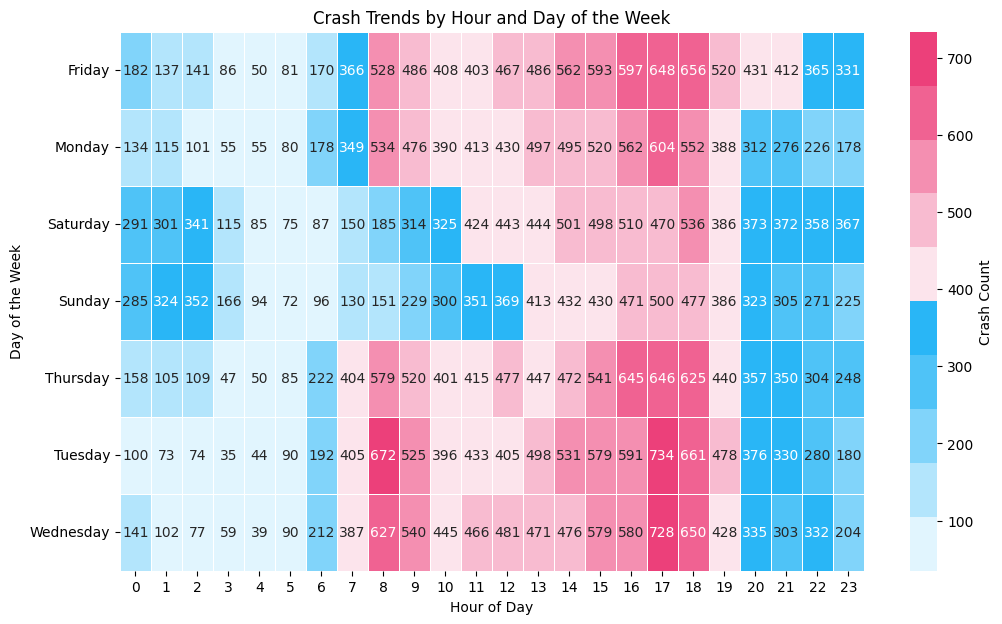

In [30]:
source_df['collision_datetime'] = pd.to_datetime(source_df['collision_datetime'])
source_df['hour_of_day'] = source_df['collision_datetime'].dt.hour

heatmap_data = source_df.pivot_table(index='day_of_week', columns='hour_of_day', values='collision_datetime', aggfunc='count')

custom_palette = [
    '#e1f5fe',
    '#b3e5fc',
    '#81d4fa',
    '#4fc3f7',
    '#29b6f6',
    '#fce4ec',
    '#f8bbd0',
    '#f48fb1',
    '#f06292',
    '#ec407a'
]

cmap = sns.color_palette(custom_palette, as_cmap=True)

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap=cmap, linewidths=.5, annot=True, fmt='d',
            cbar_kws={'label': 'Crash Count'})
plt.title('Crash Trends by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.yticks(rotation=0)


plt.show()


From the visual data, it's clear that accidents follow distinct patterns over the course of a day. The chart shows that weekdays, especially Thursday and Tuesday, tend to see a surge in crashes during the morning and evening rush hours. This trend aligns with the typical commute hours, suggesting that rush hours pose a higher risk for accidents. Thursday stands out, with the most incidents between 7 a.m. and 10 a.m. and again from 3 p.m. to 6 p.m., painting a vivid picture of a particularly hectic day.

In contrast, weekend accidents reveal a more dispersed pattern. Saturday witnesses a significant spike in crashes between noon and 3 p.m., while Sunday sees a relatively even distribution throughout the day, with a slight peak just after noon. This difference reflects the varying pace of weekend life, where leisure activities and flexible schedules lead to more fluid traffic flow.

#### 5.1.3  Interactive Analysis of Traffic Accidents: Investigating Annual Trends by Type and Day of the Week

In [26]:
import pandas as pd
from bokeh.plotting import figure, save, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, Select, HoverTool, CustomJS
from bokeh.layouts import column

columns_to_handle = ['tb_latitude', 'tb_longitude', 'collision_time', 'day_of_week', 'time_cat']
df = source_df.dropna(subset=columns_to_handle)
df['Year'] = pd.to_datetime(df['collision_datetime'], format='%m/%d/%Y %I:%M:%S %p').dt.year

agg_df = df.groupby(['type_of_collision', 'day_of_week', 'Year']).size().reset_index(name='Count')

collision_types = df['type_of_collision'].unique().tolist()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
years = sorted([year for year in df['Year'].unique() if 2005 <= year <= 2023])

initial_year = 2017
initial_data = agg_df[agg_df['Year'] == initial_year]

source = ColumnDataSource(data={
    'x': initial_data['type_of_collision'].tolist(),
    'y': initial_data['day_of_week'].tolist(),
    'count': initial_data['Count'].tolist()
})


p = figure(title="Traffic Crash Count by Type and Day of Week",
           x_range=collision_types, y_range=days_of_week,
           x_axis_location="above", width=900, height=450,
           tools="", toolbar_location=None,
           tooltips=[('Type', '@x'), ('Day of Week', '@y'), ('Count', '@count')])


custom_palette = [
    '#29b6f6', '#4fc3f7', '#81d4fa', '#b3e5fc', '#e1f5fe',
    '#fce4ec', '#f8bbd0', '#f48fb1', '#f06292', '#ec407a'
]
color_mapper = LinearColorMapper(palette=custom_palette, low=agg_df['Count'].min(), high=agg_df['Count'].max())

p.rect(x="x", y="y", width=1, height=1, source=source,
       line_color=None, fill_color={'field': 'count', 'transform': color_mapper})

color_bar = ColorBar(color_mapper=color_mapper, location=(0, 0), title="Crash Count", orientation='vertical')
p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

hover = HoverTool()
hover.tooltips = [('Type', '@x'), ('Day of Week', '@y'), ('Count', '@count')]
p.add_tools(hover)


select = Select(title="Year", value=str(initial_year), options=[str(y) for y in years])

agg_source = ColumnDataSource(agg_df)

callback = CustomJS(args=dict(source=source, agg_source=agg_source), code="""
    var year = cb_obj.value;
    var data = source.data;
    var agg_data = agg_source.data;
    var new_data = {'x': [], 'y': [], 'count': []};
    for (var i = 0; i < agg_data['Year'].length; i++){
        if (agg_data['Year'][i].toString() === year){
            new_data['x'].push(agg_data['type_of_collision'][i]);
            new_data['y'].push(agg_data['day_of_week'][i]);
            new_data['count'].push(agg_data['Count'][i]);
        }
    }
    source.data = new_data;
""")



select.js_on_change('value', callback)

layout = column(select, p)

output_notebook()
show(layout)

output_file("../assets/traffic_collision_heatmap.html", title="Traffic Collision Heatmap")
save(layout)



Loading BokehJS ...

**The interactive chart is not showing on the github page, please either check the html file called traffic_collision_heatmap.html from our uploaded zip files, or look at figure 3 from our github wepage. Thank you!**

By selecting different years, the interactive heatmap allows viewers to explore how traffic accident patterns have shifted annually based on accident type and day of the week. Rear-end collisions and broadside accidents consistently dominate weekdays, with Thursday and Friday being especially prone to increased incidents. On weekends, Saturday stands out for accidents involving pedestrians and cyclists, showing a clear trend towards greater vulnerability. The data also highlights a midweek pattern where Monday and Tuesday show fewer incidents overall, compared to the late-week surge.

#### 5.1.4 High level crash count by District in San Francisco

From below map chart showing the crash count by San Francisco districts, we can see that the crash count is extremely higher in district "SOUTHERN", "NORTHERN", and "MISSION". The rest districts except "PARK" and "TENDERLOIN" have also relatively high count of traffic crash. However we would like to understand why, so we created a detailed map in chart 5.1.4 as well.

In [13]:
import geopandas as gpd
import json
import plotly.express as px
from urllib.request import urlopen

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.tb_longitude, df.tb_latitude))
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    district_data = json.load(response)
districts_gdf = gpd.GeoDataFrame.from_features(district_data)
# Perform the spatial join
gdf_with_districts = gpd.sjoin(gdf, districts_gdf, how='left', predicate='within')
# Group by 'DISTRICT' and count the occurrences
gdf_with_districts = gdf_with_districts.groupby(['DISTRICT']).size().reset_index(name='crash_count')

# Plotting the map of crash count by district
fig = px.choropleth_mapbox(
    gdf_with_districts, geojson=district_data,
    locations='DISTRICT',
    color='crash_count',  # Color points by crash count
    color_continuous_scale="RdBu",
    range_color=(0, gdf_with_districts['crash_count'].max()),
    hover_name='DISTRICT',  # Show district name on hover
    mapbox_style='carto-positron',  # open-street-map
    zoom=10.5,  # Set the initial zoom level
    center={'lat': 37.7749, 'lon': -122.4194}  # Center the map on San Francisco
)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},
                  title_text="Number of traffic crashes by District in San Francisco (2005 - 2023)",
                  title_font_size=20,
                  height=500,
                  width=900,
                 )
fig.show()

# Save the map to an HTML file
fig.write_html("../_includes/district_map_traffic_crash.html")


**The interactive chart is not showing on the github page, please either check the html file called district_map_traffic_crash.html from our uploaded zip files, or look at figure 4 from our github wepage. Thank you!**

#### 5.1.5 A more detailed look on the map

Upon closer examination, it becomes evident that the North-East part of San Francisco, encompassing the high-count districts, is characterized by a higher prevalence of major roads and highways (as indicated by the yellow color on the map), contrasting with the predominantly smaller local roads (indicated by white color) in other parts of the city. This disparity in road infrastructure could significantly contribute to the increased traffic crashes observed in "SOUTHERN," "NORTHERN," and "MISSION" districts, given the higher volume of vehicles and elevated speeds typically associated with major roads and highways.

Further research online corroborates our findings, with two news sources [4][5] highlighting specific intersections notorious for their heightened risk of traffic crashes. Notably, the top three intersections identified as "5th and Market," "Market and Octavia," and "6th and Market" all reside within the SOUTHERN district, further validating our data-driven observations. These reports advocate for governmental intervention, suggesting a comprehensive investigation and potential redevelopment of these high-risk intersections to proactively mitigate future traffic crashes.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.tb_latitude, df.tb_longitude))
# Create a base map
map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(map)
# Add points to the marker cluster
for idx, row in gdf.iterrows():
    folium.Marker(location=[row['tb_latitude'], row['tb_longitude']]).add_to(marker_cluster)

# Save the map to html format.
map.save('../assets/detailed_map_traffic_crash.html')


**The interactive chart is not showing on the github page, please either check the html file called detailed_map_traffic_crash.html from our uploaded zip files, or look at figure 5 from our github wepage. Thank you!**

#### 5.1.6 Accident Network Graph

By analyzing the relationships between different participant types in traffic accidents in San Francisco, we have discovered the main interaction patterns. Pedestrians, drivers, and cyclists are the most common participant types. Pedestrians have the highest frequency of interactions with other types, which indicates that pedestrians are the most vulnerable to threats from the streets.

In [23]:
import networkx as nx
import plotly.graph_objects as go

# Remove rows where 'party1_type' or 'party2_type' are nan
party_data = df[['party1_type', 'party2_type']].dropna()

# Create the graph
G = nx.from_pandas_edgelist(party_data, 'party1_type', 'party2_type', create_using=nx.Graph())

# Node positions using the spring layout
pos = nx.spring_layout(G)

# Prepare data for Plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    textposition="middle center",
    hoverinfo='text',
    hovertext=[],
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=[],
        color=[],
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple([G.degree(node)])
    node_trace['marker']['size'] += tuple([G.degree(node) * 10])
    node_trace['text'] += tuple([node])
    node_trace['hovertext'] += tuple([f'{node}: {G.degree(node)} connections'])

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Accident Network Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
)
# Show plot
fig.show()

# Save the map to an HTML file
fig.write_html("../_includes/Accident_Network_Graph.html")


**The interactive chart is not showing on the github page, please either check the html file called Accident_Network_Graph.html from our uploaded zip files, or look at figure 6 from our github wepage. Thank you!**

#### 5.1.7 Collision Type and Severity Analysis

Between 2005 and 2023, We've noticed some major patterns and causes of accidents. Broadside, rear end, and vehicle-pedestrian collisions are the most common types, leading to many injuries and fatalities. This means it's crucial for us as drivers to stay alert to vehicles approaching from the side and rear and to yield to pedestrians promptly.

Furthermore, We've also observed that pain accounts for most of the severity in many accident types. However, due to the fragility of the human body, the number and proportion of severe injuries and fatalities in vehicle-pedestrian collisions are visibly higher than in other types. In 2021, out of 45 victims in 44 accidents in San Francisco, 40% were pedestrians [6]. We believe this might be related to the legalization of jaywalking in California in 2018 [7]. The unpredictability and chaos of jaywalking and random crossings could be positively correlated with the incidence of accidents and the increased likelihood of injury to pedestrians.

In [25]:
# Prepare the data by grouping and counting the instances for each combination of collision type and severity
collision_data = df.groupby(['type_of_collision', 'collision_severity']).size().reset_index(name='count')

# Create the interactive stacked bar chart using plotly
fig = px.bar(
    collision_data,
    x='type_of_collision',
    y='count',
    color='collision_severity',
    title='Collision Type and Severity Analysis',
    labels={'type_of_collision': 'Type of Collision', 'count': 'Number of Collisions', 'collision_severity': 'Collision Severity'},
)

# Enhance the layout for better readability
fig.update_layout(
    xaxis_title='Type of Collision',
    yaxis_title='Number of Collisions',
    legend_title='Collision Severity',
    barmode='stack'
)

# Show the plot
fig.show()

# Save the map to an HTML file
fig.write_html("../_includes/Collision_Type_and_Severity_Analysis.html")


**The interactive chart is not showing on the github page, please either check the html file called Collision_Type_and_Severity_Analysis.html from our uploaded zip files, or look at figure 7 from our github wepage. Thank you!**

### 5.2 Why are they right for the story you want to tell?

The temporal perspective plays a crucial role in analyzing traffic crash patterns and reasons. Our investigation delved into the influence of holidays on traffic crash counts, trends during morning and evening rush hours, and variations in crash frequency across different days of the week. Each analysis section revealed distinct patterns and reasons, enriching our understanding of the data.

Similarly, the geographic perspective is pivotal. Through two charts depicting the geographic distribution, we scrutinized the underlying features to identify districts in San Francisco with higher traffic crash rates and discern the contributing factors. The findings, highlighted in section 5.1, not only enhanced our comprehension of the data but also facilitated the formulation of suggestions and recommendations for heightened awareness and caution when traversing these districts.

The network graph effectively illustrates the relationships between different types of participants in accidents. This helps in understanding how often certain types of participants are involved in accidents with each other. The varying node sizes highlight which participants have the most connections, indicating their frequent involvement in accidents.

The stacked bar chart breaks down collision types and severity and categorizes collisions based on severity, which helps in understanding the distribution and impact of different types of collisions. It allows for easy comparison of collision types, highlighting which types are more common or more severe.

## 6. Discussion

### 6.1 What went well?

1. **Data prepration and cleaning**: In our analysis of San Francisco's traffic crash dataset, our attention to detail in data cleaning and preprocessing led to reliable and accurate insights. By eliminating redundant columns and thoroughly addressing missing data, we ensured that the dataset provided a solid foundation. For instance, removing duplicated records resulted in a complete elimination of data duplication. This allowed us to focus on key features like collision types and accident timing, creating visualizations that told a clear and compelling story.

2. **Data Analysis and visualizations**: 
    - Our diverse range of visualizations proved highly effective in conveying our findings. The interactive heatmap showcasing crash patterns by day and hour gave a comprehensive view of traffic trends, clearly illustrating the elevated risks during rush hours on weekdays. The dual bar chart comparing traffic accidents on public holidays versus workdays highlighted how celebrations like July 4th and November 23rd influenced traffic safety.
    - We incorporated narrative techniques like “Visual Structuring” to organize these visualizations, making the data digestible. Highlighting important areas using “Transition Guidance” helped guide the reader's attention and emphasized the critical points.
    - Our geographical analysis effectively highlighted accident-prone areas. By using OpenStreetMap data, we discovered that the Southern, Northern, and Mission districts consistently reported the highest crash frequencies. Detailed maps pointed to specific intersections where targeted improvements could yield the greatest impact.
    - Lastly, the network graph illustrated the relationships between different participants in traffic accidents. It showcased frequent interactions between vehicles and pedestrians, underscoring the importance of safer pedestrian infrastructure and reinforcing jaywalking regulations.

3. **Unearthing Root Causes and Patterns in Traffic Crashes**: Our discovery of intriguing patterns and underlying reasons (Please see our webpage for comprehensive analysis) within the San Francisco traffic crash data has not only enriched our comprehension of the dataset but has also empowered us to narrate an accurate and compelling story. Furthermore, it has positioned us to offer valuable recommendations to the residents and government of San Francisco.

### 6.2 What is still missing? What could be improved?, Why?

While our visualizations have successfully illuminated many insights from the dataset, several areas could still be improved.

1. **Limited features in the dataset**: Firstly, the traffic crash dataset contains limited numerical features, restricting the depth of our statistical analysis. For instance, incorporating data like vehicle speed or driver demographics would enable more precise predictions of accident likelihood and identify high-risk groups. Further granularity in weather conditions (e.g., fog, wind) could highlight specific atmospheric factors that contribute to certain types of collisions. 

2. **Transition among visualizations**: In terms of narrative structure, the visual narrative could be enhanced by providing smoother transition guidance between visualizations. For example, linking the crash type analysis directly to the network graph would clarify patterns, such as how broadside collisions lead to fatal interactions involving pedestrians.

3. **Interactivity on visualizations**: User interactivity is another area that can be improved. While the interactive heatmap reveals temporal trends, adding user-controlled filtering by accident severity or location would provide a more tailored exploration. For instance, allowing users to filter crashes near specific intersections could help identify common patterns. Geographically, additional spatial layers, such as road infrastructure and traffic density, would provide more context to high-frequency crash areas like the Southern district. This would help uncover whether factors like road quality or vehicular congestion contribute to increased accidents.

Overall, while our current visualizations reveal useful information, addressing these improvements would offer a more comprehensive understanding of San Francisco's traffic crash patterns.

## 7. Contributions

<table align="left">
  <tr>
    <th style="text-align:left;">Final Project</th>
    <th style="text-align:left;">Develop</th>
    <th style="text-align:left;">Review</th>
  </tr>
  <tr>
    <td style="text-align:left;">Notebook Part1</td>
    <td style="text-align:left;">Wen Gao</td>
    <td style="text-align:left;">Zheng Dong, Yuming Zhang</td>
  </tr>
  <tr>
    <td style="text-align:left;">Notebook Part2</td>
    <td style="text-align:left;">Wen Gao</td>
    <td style="text-align:left;">Zheng Dong, Yuming Zhang</td>
  </tr>
  <tr>
    <td style="text-align:left;">Notebook Part3</td>
    <td style="text-align:left;">Yuming Zhang, Wen Gao</td>
    <td style="text-align:left;">Zheng Dong</td>
  </tr>
  <tr>
    <td style="text-align:left;">Notebook Part4</td>
    <td style="text-align:left;">Zheng Dong</td>
    <td style="text-align:left;">Yuming Zhang, Wen Gao</td>
  </tr>
  <tr>
    <td style="text-align:left;">Notebook Part5</td>
    <td style="text-align:left;">Yuming Zhang(5.1.1-5.1.3), Wen Gao(5.1.4-5.1.5), Zheng Dong(5.1.6-5.1.7)</td>
    <td style="text-align:left;">All</td>
  </tr>
  <tr>
    <td style="text-align:left;">Notebook Part6</td>
    <td style="text-align:left;">Yuming Zhang</td>
    <td style="text-align:left;">Wen Gao, Zheng Dong</td>
  </tr>
  <tr>
    <td style="text-align:left;">Webpage Framework</td>
    <td style="text-align:left;">Wen Gao</td>
    <td style="text-align:left;">Yuming Zhang, Zheng Dong</td>
  </tr>
  <tr>
    <td style="text-align:left;">Webpage first 3 charts and description</td>
    <td style="text-align:left;">Yuming Zhang</td>
    <td style="text-align:left;">Wen Gao, Zheng Dong</td>
  </tr>
  <tr>
    <td style="text-align:left;">Webpage charts 4 and 5 and description</td>
    <td style="text-align:left;">Wen Gao</td>
    <td style="text-align:left;">Yuming Zhang, Zheng Dong</td>
  </tr>
  <tr>
    <td style="text-align:left;">Webpage charts 6 and 7 and description</td>
    <td style="text-align:left;">Zheng Dong</td>
    <td style="text-align:left;">Yuming Zhang, Wen Gao</td>
  </tr>
</table>

<table align="left">
  <tr>
    <th style="text-align:left;">Student Name</th>
    <th style="text-align:left;">Student Number</th>
  </tr>
  <tr>
    <td style="text-align:left;">Wen Gao</td>
    <td style="text-align:left;">s233366</td>
  </tr>
  <tr>
    <td style="text-align:left;">Yuming Zhang</td>
    <td style="text-align:left;">s232252</td>
  </tr>
  <tr>
    <td style="text-align:left;">Zheng Dong</td>
    <td style="text-align:left;">s232281</td>
  </tr>
</table>

## 8. References
[1] Dataset source: https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx/about_data  
[2] Data Cleaning Steps & Process to Prep Your Data for Success: https://monkeylearn.com/blog/data-cleaning-steps/  
[3] Bay Area Highway Deaths Drop In 2020, Reflecting Decline In Traffic During Pandemic: https://www.cbsnews.com/sanfrancisco/news/bay-area-highway-deaths-drop-in-2020-reflecting-decline-in-traffic-during-pandemic/  
[4] CAR ACCIDENTS IN SAN FRANCISCO COUNTY: STATISTICS, INTERSECTION DATA, AND MORE: https://www.rmdlaw.com/personal-injury-blog/car-accidents-in-san-francisco-statistics-intersection-data-and-more/  
[5] The San Francisco streets where you’re most likely to be hit by a car: https://sfstandard.com/2022/09/21/the-san-francisco-streets-youre-most-likely-to-be-hit-by-a-car-on/  
[6] Dangerous San Jose intersection to see safety upgrade after fatal hit-and-runs: https://abc7news.com/san-jose-sj-hit-and-runs-dangerous-intersection-in-monterey-road/11036761/  
[7] Californians will soon be able to jaywalk - as long as it's safe - without getting a ticket: https://abc7news.com/jaywalking-california-new-law-legal/12291007/
